In [491]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [455]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [456]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [457]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [458]:
df_train.shape

(8693, 14)

In [459]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Data preprocessing

In [460]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [461]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Missing data 

In [462]:
df_train['Cabin'] = df_train['Cabin'].str.strip()
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split('/', expand=True)

In [463]:
df_test['Cabin'] = df_train['Cabin'].str.strip()
df_test[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split('/', expand=True)

In [464]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [465]:
df_train['Side'].value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

In [466]:
missing_values_count = df_train.isna().sum()
print(missing_values_count)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Num             199
Side            199
dtype: int64


<Axes: >

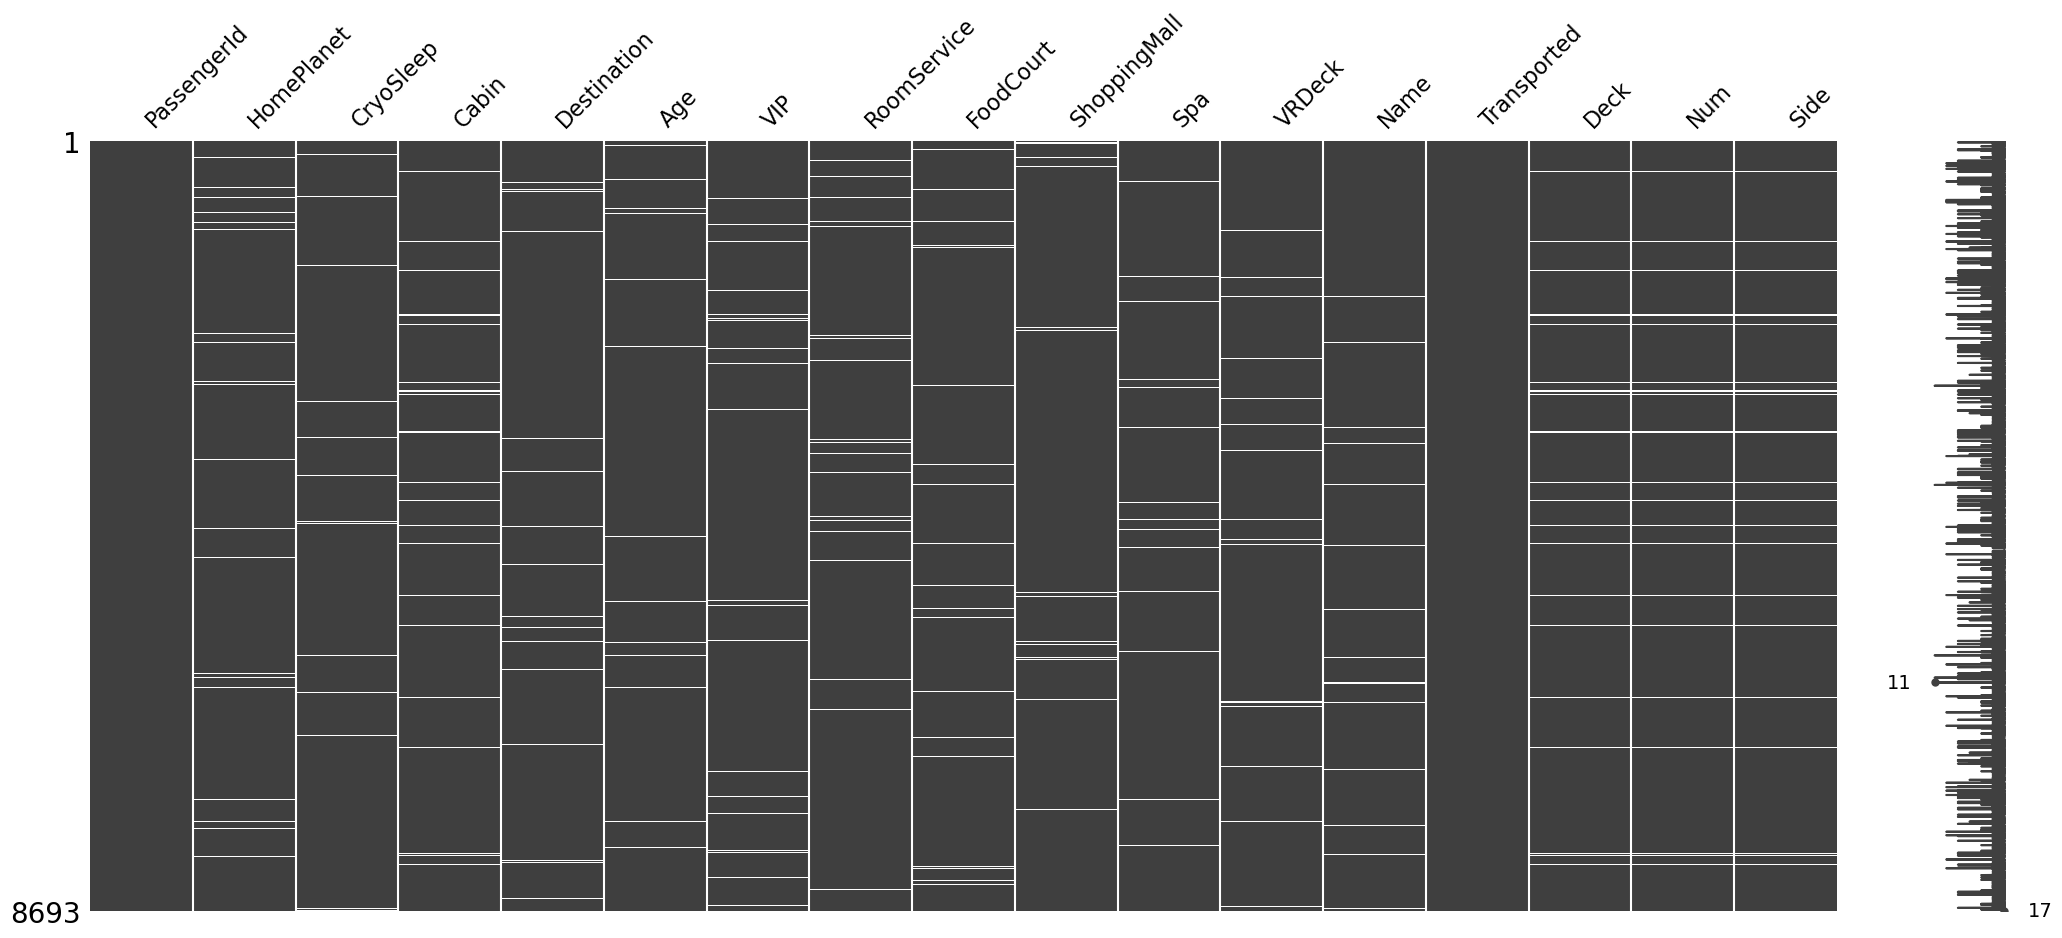

In [467]:
msno.matrix(df_train)

In [468]:
#Impute with mode for categorical columns
home_planet_mode = df_train['HomePlanet'].mode()[0]
destination_mode = df_train['Destination'].mode()[0]
cryosleep_mode = df_train['CryoSleep'].mode()[0]
vip_mode = df_train['VIP'].mode()[0]
deck_mode = df_train['Deck'].mode()[0]
num_mode = df_train['Num'].mode()[0]
side_mode = df_train['Side'].mode()[0]




# Fill missing values in training and testing datasets
df_train['HomePlanet'].fillna(home_planet_mode, inplace=True)
df_test['HomePlanet'].fillna(home_planet_mode, inplace=True)
df_train['Destination'].fillna(destination_mode, inplace=True)
df_test['Destination'].fillna(destination_mode, inplace=True)
df_train['CryoSleep'].fillna(cryosleep_mode, inplace=True)
df_test['CryoSleep'].fillna(cryosleep_mode, inplace=True)
df_train['VIP'].fillna(vip_mode, inplace=True)
df_test['VIP'].fillna(vip_mode, inplace=True)
df_train['Deck'].fillna(deck_mode, inplace=True)
df_test['Deck'].fillna(deck_mode, inplace=True)
df_train['Num'].fillna(num_mode, inplace=True)
df_test['Num'].fillna(num_mode, inplace=True)
df_train['Side'].fillna(side_mode, inplace=True)
df_test['Side'].fillna(side_mode, inplace=True)

In [469]:
# Compute means for each column once from the training dataset
age_mean = df_train['Age'].mean()
room_service_mean = df_train['RoomService'].mean()
food_court_mean = df_train['FoodCourt'].mean()
shopping_mall_mean = df_train['ShoppingMall'].mean()
spa_mean = df_train['Spa'].mean()
vr_deck_mean = df_train['VRDeck'].mean()

# Fill missing values in the training dataset
df_train['Age'].fillna(age_mean, inplace=True)
df_train['RoomService'].fillna(room_service_mean, inplace=True)
df_train['FoodCourt'].fillna(food_court_mean, inplace=True)
df_train['ShoppingMall'].fillna(shopping_mall_mean, inplace=True)
df_train['Spa'].fillna(spa_mean, inplace=True)
df_train['VRDeck'].fillna(vr_deck_mean, inplace=True)

# Fill missing values in the testing dataset using the same means from the training dataset
df_test['Age'].fillna(age_mean, inplace=True)
df_test['RoomService'].fillna(room_service_mean, inplace=True)
df_test['FoodCourt'].fillna(food_court_mean, inplace=True)
df_test['ShoppingMall'].fillna(shopping_mall_mean, inplace=True)
df_test['Spa'].fillna(spa_mean, inplace=True)
df_test['VRDeck'].fillna(vr_deck_mean, inplace=True)

In [470]:
df_train=df_train.drop(['Name','Cabin','PassengerId'],axis=1)
df_test=df_test.drop(['Name','Cabin'],axis=1)
df_train['Num']=df_train['Num'].astype('int')
df_test['Num']=df_test['Num'].astype('int')

<Axes: >

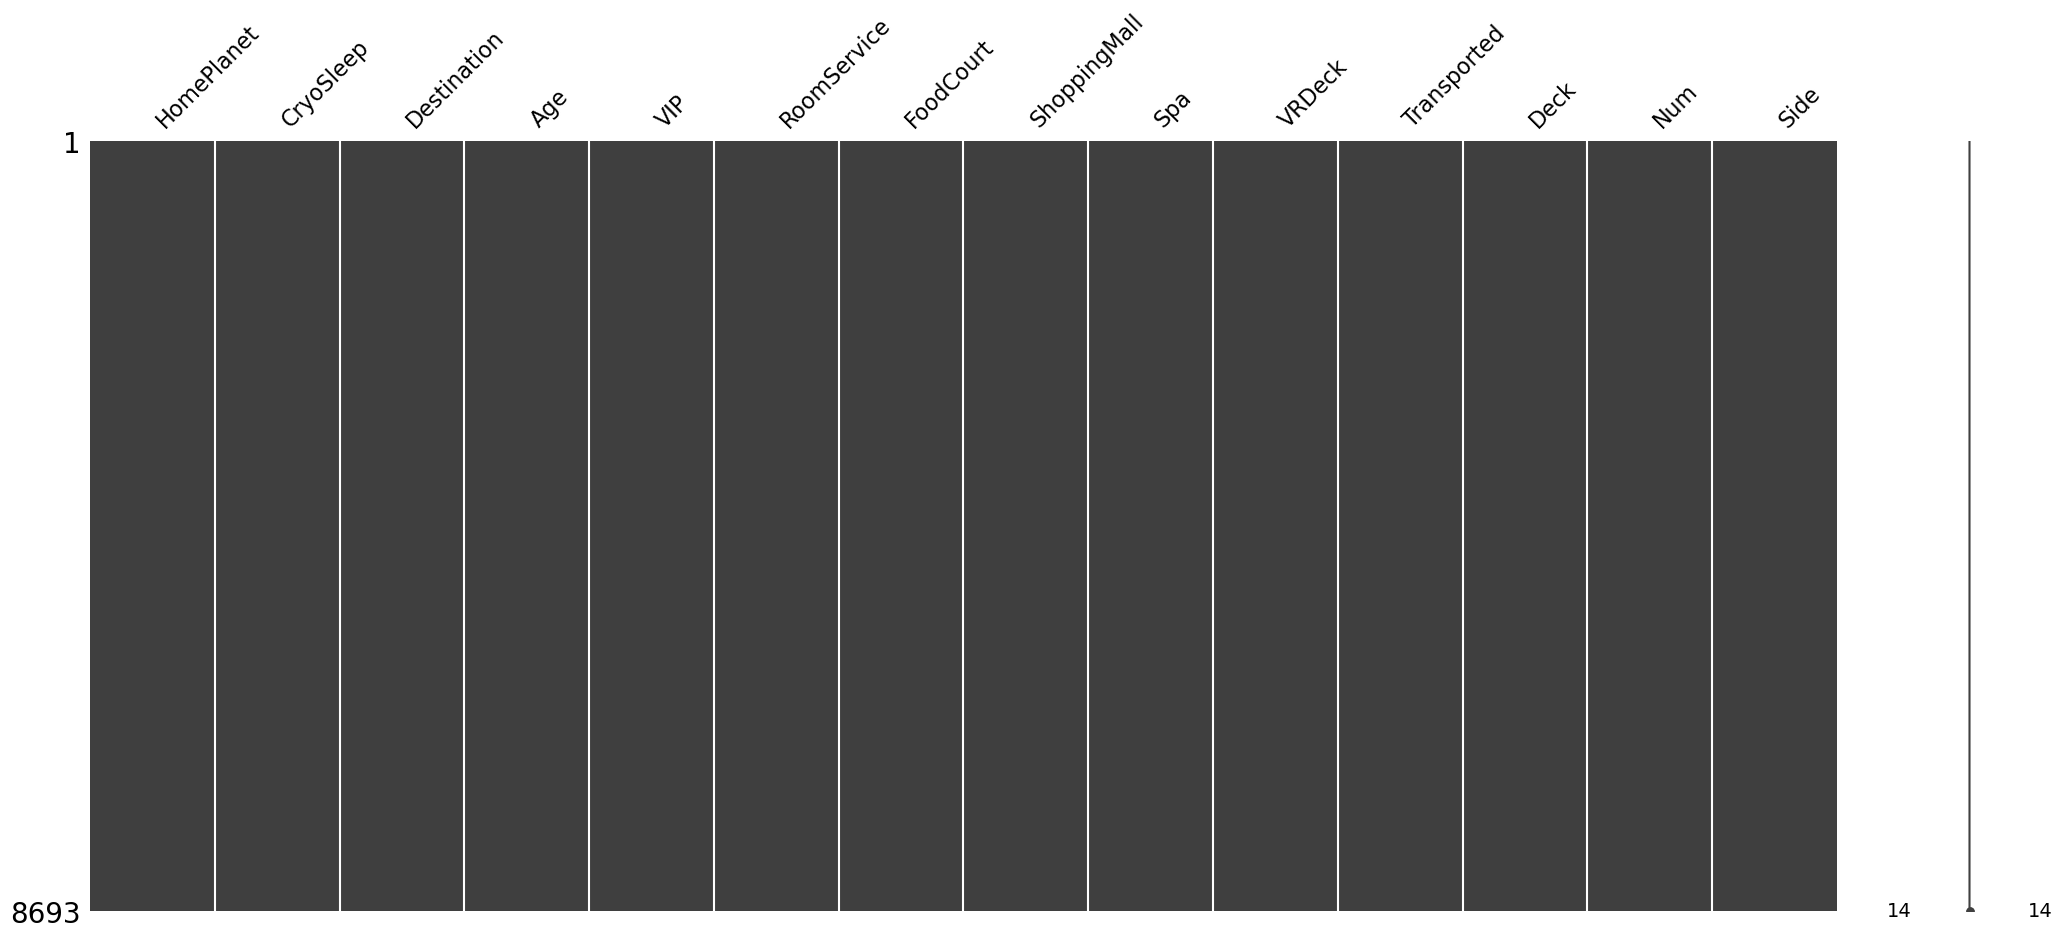

In [471]:
msno.matrix(df_train)

<Axes: >

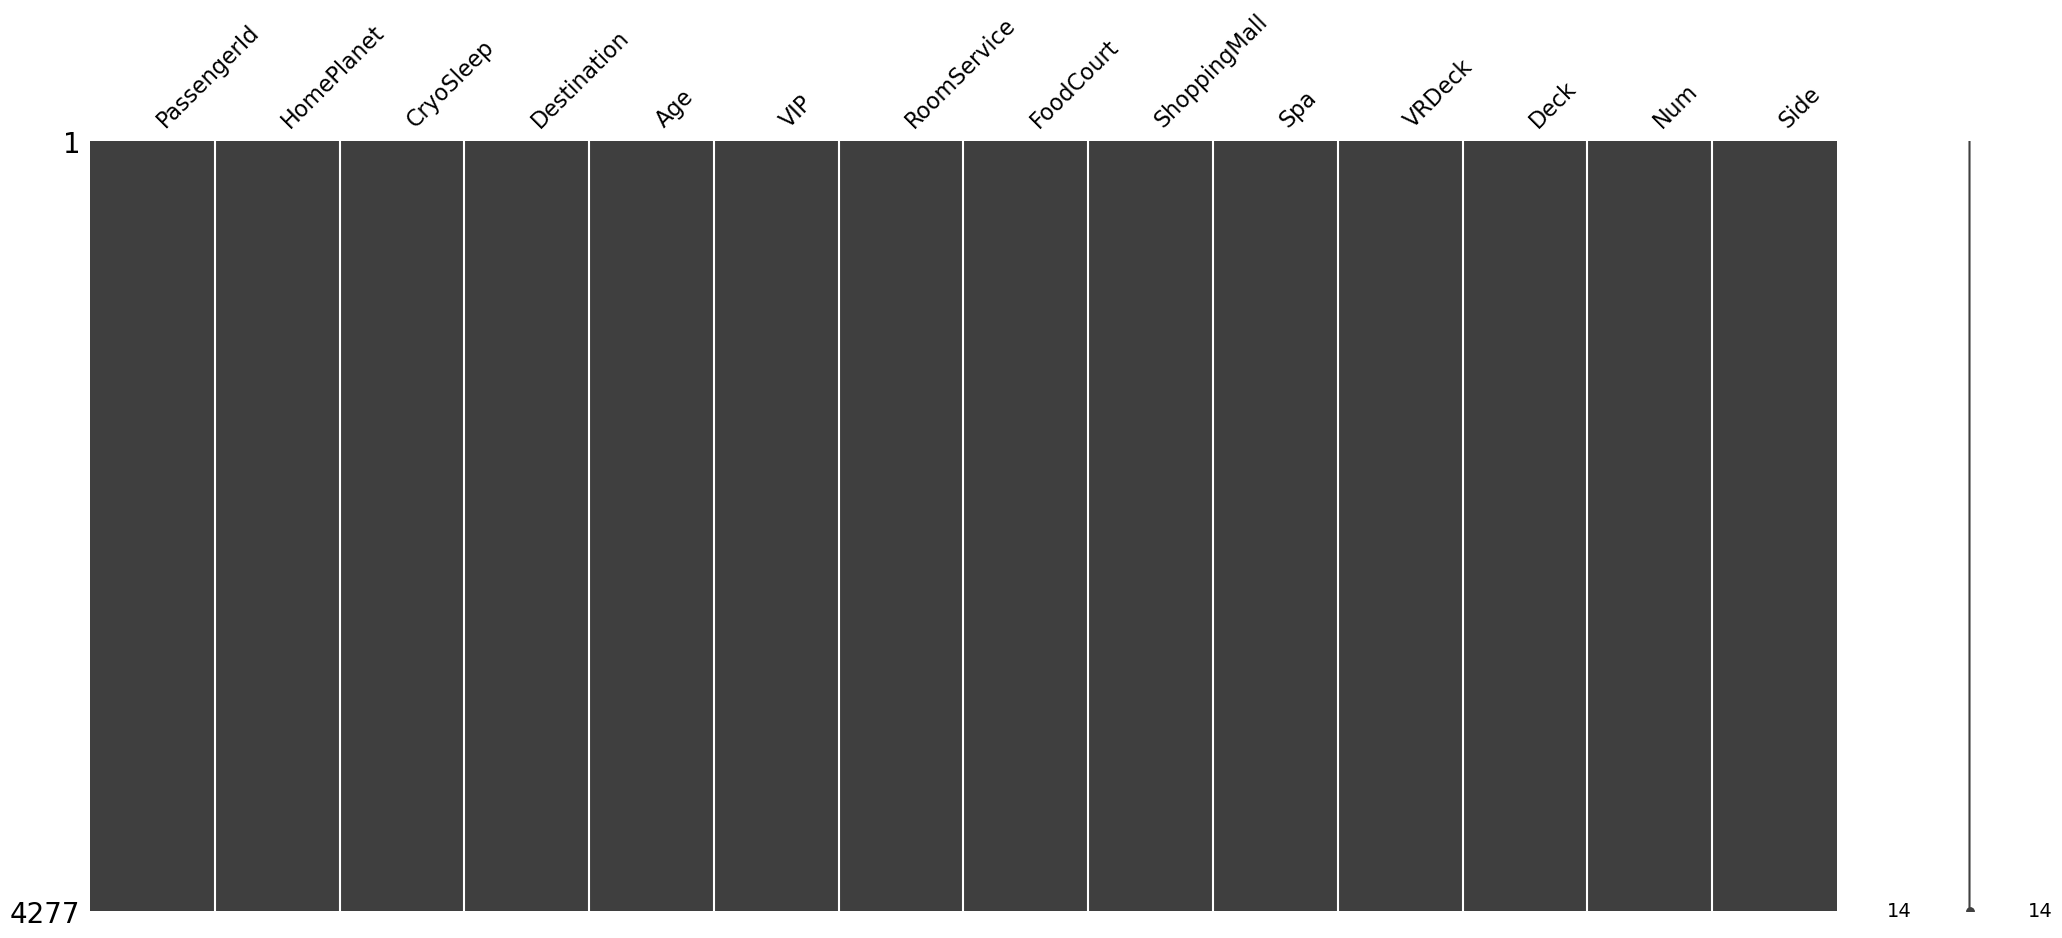

In [472]:
msno.matrix(df_test)

## Data transformation

Columns to drop:
- passengerID
- Name

Columns to do nothing too:
- Age
- Room Service,
- FoodCourt
- ShoppingMall
- Spa
- VRDeck

Columns to One-Hot-Encode:
- HomePlanet
- Destination

Columns to Label Encode:
- CyroSleep
- VIP
- Transported

Cabin- extract information such as deck and side


In [473]:
categorical_columns=['CryoSleep','VIP','HomePlanet','Destination','Deck','Side']
for column in categorical_columns:
    df_train[column]=df_train[column].astype('category')
    df_test[column]=df_test[column].astype('category')


In [474]:
# Label encode CyroSleep, VIP and Transported 
le = preprocessing.LabelEncoder() 
  
df_train['CryoSleep']= le.fit_transform(df_train['CryoSleep'])
df_test['CryoSleep']= le.fit_transform(df_test['CryoSleep'])

df_train['VIP']= le.fit_transform(df_train['VIP'])
df_test['VIP']= le.fit_transform(df_test['VIP'])

df_train['Side']= le.fit_transform(df_train['Side'])
df_test['Side']= le.fit_transform(df_test['Side'])

df_train['Transported']= le.fit_transform(df_train['Transported'])
categories = le.classes_
print("Encoded categories:", categories)

Encoded categories: [False  True]


In [475]:
# One-Hot-Encode HomePlanet and Destination
# Define the categories you want to encode
categories = ['HomePlanet', 'Destination','Deck']

# Create the encoder instance
encoder = OneHotEncoder(sparse=False, drop='first')  # Optionally use drop='first' to avoid dummy variable trap

# Fit the encoder to the training data
encoder.fit(df_train[categories])

# Transform the categories in the data
encoded_categories = encoder.transform(df_train[categories])

# Create a DataFrame from the encoded categories with appropriate column names
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categories))

# Concatenate the new DataFrame with the original DataFrame minus the categorical columns
df_train = pd.concat([df_train.drop(categories, axis=1), encoded_df], axis=1)

# Display the final DataFrame
print(df_train)

      CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0             0  39.0    0          0.0        0.0           0.0     0.0   
1             0  24.0    0        109.0        9.0          25.0   549.0   
2             0  58.0    1         43.0     3576.0           0.0  6715.0   
3             0  33.0    0          0.0     1283.0         371.0  3329.0   
4             0  16.0    0        303.0       70.0         151.0   565.0   
...         ...   ...  ...          ...        ...           ...     ...   
8688          0  41.0    1          0.0     6819.0           0.0  1643.0   
8689          1  18.0    0          0.0        0.0           0.0     0.0   
8690          0  26.0    0          0.0        0.0        1872.0     1.0   
8691          0  32.0    0          0.0     1049.0           0.0   353.0   
8692          0  44.0    0        126.0     4688.0           0.0     0.0   

      VRDeck  Transported   Num  ...  HomePlanet_Mars  \
0        0.0            0     

/Users/elliebarranbeck/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [476]:
categories = ['HomePlanet', 'Destination','Deck']


# Fit the encoder to the training data
encoder.fit(df_test[categories])

# Transform the categories in the data
encoded_categories = encoder.transform(df_test[categories])

# Create a DataFrame from the encoded categories with appropriate column names
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categories))

# Concatenate the new DataFrame with the original DataFrame minus the categorical columns
df_test = pd.concat([df_test.drop(categories, axis=1), encoded_df], axis=1)

# Display the final DataFrame
print(df_test)

     PassengerId  CryoSleep       Age  VIP  RoomService  FoodCourt  \
0        0013_01          1  27.00000    0          0.0        0.0   
1        0018_01          0  19.00000    0          0.0        9.0   
2        0019_01          1  31.00000    0          0.0        0.0   
3        0021_01          0  38.00000    0          0.0     6652.0   
4        0023_01          0  20.00000    0         10.0        0.0   
...          ...        ...       ...  ...          ...        ...   
4272     9266_02          1  34.00000    0          0.0        0.0   
4273     9269_01          0  42.00000    0          0.0      847.0   
4274     9271_01          1  28.82793    0          0.0        0.0   
4275     9273_01          0  28.82793    0          0.0     2680.0   
4276     9277_01          1  43.00000    0          0.0        0.0   

      ShoppingMall     Spa  VRDeck  Num  ...  HomePlanet_Mars  \
0              0.0     0.0     0.0    0  ...              0.0   
1              0.0  2823.0   

/Users/elliebarranbeck/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [477]:
df_test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,...,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Random Forest Classifier

In [478]:
rf = RandomForestClassifier()
X_train=df_train.drop(['Transported'],axis=1)
y_train=df_train['Transported']
rf.fit(X_train,y_train)

RandomForestClassifier()

In [479]:
X_test=df_test.drop(['PassengerId'],axis=1)
y_pred = rf.predict(X_test)

                      Feature  Importance
8                         Num    0.175587
1                         Age    0.131902
6                         Spa    0.112395
7                      VRDeck    0.100384
3                 RoomService    0.097316
0                   CryoSleep    0.086391
4                   FoodCourt    0.083450
5                ShoppingMall    0.069286
10          HomePlanet_Europa    0.023397
9                        Side    0.022111
19                     Deck_G    0.015895
11            HomePlanet_Mars    0.015764
13    Destination_TRAPPIST-1e    0.014246
18                     Deck_F    0.012976
17                     Deck_E    0.011309
15                     Deck_C    0.007372
12  Destination_PSO J318.5-22    0.007303
14                     Deck_B    0.007213
16                     Deck_D    0.003226
2                         VIP    0.002434
20                     Deck_T    0.000041


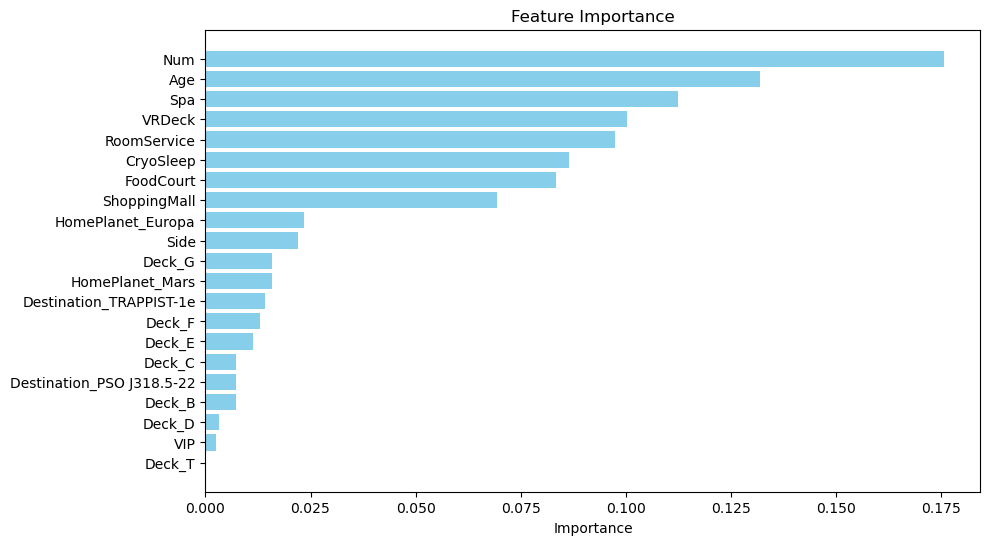

In [480]:
feature_importances = rf.feature_importances_

# Create a DataFrame to view the features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)  # Sorting to make it more informative

# Display the feature importances
print(features_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

In [481]:
df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': y_pred
})

In [482]:
df.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [483]:
df['Transported'] = df['Transported'].astype(bool)

In [484]:
df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [485]:
df.to_csv('submission.csv', index=False)

# Logistic Regression

In [413]:
clf = LogisticRegression(random_state=0,max_iter=1000)
X_train=df_train.drop(['Transported'],axis=1)
y_train=df_train['Transported']
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [414]:
X_test=df_test.drop(['PassengerId'],axis=1)
y_pred = clf.predict(X_test)

In [415]:
df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': y_pred
})

In [416]:
df.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [417]:
df['Transported'] = df['Transported'].astype(bool)

In [418]:
df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [419]:
df.to_csv('submission.csv', index=False)

# XGBoost

In [486]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
X_train=df_train.drop(['Transported'],axis=1)
y_train=df_train['Transported']
# Fit the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [487]:
X_test=df_test.drop(['PassengerId'],axis=1)
y_pred = model.predict(X_test)

In [488]:
df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': y_pred
})

In [489]:
df['Transported'] = df['Transported'].astype(bool)

In [490]:
df.to_csv('submission.csv', index=False)